## Setup and import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

%matplotlib inline

## Data loading

In [3]:
RAW_DATA_PATH = './data/raw'
train_data = pd.read_csv(f'{RAW_DATA_PATH}/train.csv')
test_data = pd.read_csv(f'{RAW_DATA_PATH}/test.csv')

In [6]:
# merge train and test data for calculating the total amount of data
raw_data = pd.concat([train_data, test_data])
print(raw_data)

                                         original_text     source  pornografi  \
0    [QUOTE=jessepinkman16;5a50ac34d89b093f368b456e...     kaskus           0   
1    @verosvante kita2 aja nitizen yang pada kepo,t...  instagram           0   
2    "#SidangAhok smg sipenista agama n ateknya mat...    twitter           0   
3    @bolususulembang.jkt barusan baca undang2 ini....  instagram           0   
4    bikin anak mulu lu nof \nkaga mikir apa kasian...     kaskus           0   
..                                                 ...        ...         ...   
773  RT @KapalKertasFFI: Meski hanya Show Of Force,...    twitter           0   
774  Da ky fpi u be, haha RT @jeffrey_stwn: hajar C...    twitter           0   
775  Manahan pantat isi nya lemak semua. Gua suuzon...  instagram           1   
776  @uzman910 kw tebak sndri la,... kok cmna..biar...  instagram           0   
777  Emang negro ga boleh ya bre pake sweater atau ...     kaskus           0   

     sara  radikalisme  pen

In [8]:
raw_data.head()

,original_text,source,pornografi,sara,radikalisme,pencemaran_nama_baik
0,[QUOTE=jessepinkman16;5a50ac34d89b093f368b456e...,kaskus,0,0,0,1
1,"@verosvante kita2 aja nitizen yang pada kepo,t...",instagram,0,0,0,0
2,"""#SidangAhok smg sipenista agama n ateknya mat...",twitter,0,1,1,1
3,@bolususulembang.jkt barusan baca undang2 ini....,instagram,0,0,0,0
4,bikin anak mulu lu nof \nkaga mikir apa kasian...,kaskus,0,0,0,0


In [9]:
raw_data.describe()

,pornografi,sara,radikalisme,pencemaran_nama_baik
count,7773.000000,7773.000000,7773.000000,7773.000000
mean,0.224752,0.159269,0.164158,0.311977
std,0.417446,0.365951,0.370443,0.463330
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [10]:
train_data.head()

,original_text,source,pornografi,sara,radikalisme,pencemaran_nama_baik
0,[QUOTE=jessepinkman16;5a50ac34d89b093f368b456e...,kaskus,0,0,0,1
1,"@verosvante kita2 aja nitizen yang pada kepo,t...",instagram,0,0,0,0
2,"""#SidangAhok smg sipenista agama n ateknya mat...",twitter,0,1,1,1
3,@bolususulembang.jkt barusan baca undang2 ini....,instagram,0,0,0,0
4,bikin anak mulu lu nof \nkaga mikir apa kasian...,kaskus,0,0,0,0


In [11]:
train_data.describe()

,pornografi,sara,radikalisme,pencemaran_nama_baik
count,6995.000000,6995.000000,6995.000000,6995.000000
mean,0.225018,0.160686,0.164975,0.311651
std,0.417624,0.367268,0.371185,0.463201
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [12]:
test_data.head()

,original_text,source,pornografi,sara,radikalisme,pencemaran_nama_baik
0,"1.BUKAN CM SPANDUK PROF,VIDEO2 ORASI MEREKA, B...",twitter,0,0,1,0
1,@memeqbeceq gy sange'gatel yh tetek'memekY drn...,twitter,1,0,0,0
2,Pertama kali denger lagunya enk bgt in dan png...,instagram,0,0,0,0
3,"astajim, ini pasti yg kasih penghargaan ke ibu...",kaskus,0,0,0,0
4,beda kalo disini kalo komplain lgs di bully am...,kaskus,0,0,0,0


In [13]:
test_data.describe()

,pornografi,sara,radikalisme,pencemaran_nama_baik
count,778.000000,778.000000,778.000000,778.000000
mean,0.222365,0.146530,0.156812,0.314910
std,0.416103,0.353864,0.363858,0.464779
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


0      386
1      458
2      140
3      348
4      104
      ... 
773    142
774    124
775    104
776    109
777     85
Name: original_text, Length: 7773, dtype: int64


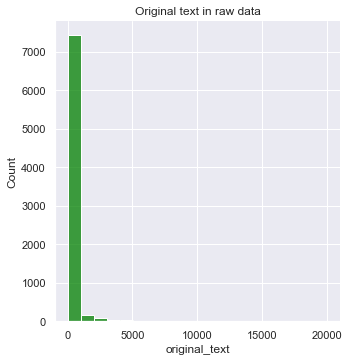

In [53]:
sns.set(color_codes=True)
comment_len = raw_data.original_text.str.len()
sns.displot(comment_len, kde=False, bins=20,color="green").set(title="Original text in raw data")
print(comment_len)
# plt.savefig("raw_data_graph.png")

0       386
1       458
2       140
3       348
4       104
       ... 
6990    137
6991    169
6992    130
6993    113
6994    137
Name: original_text, Length: 6995, dtype: int64


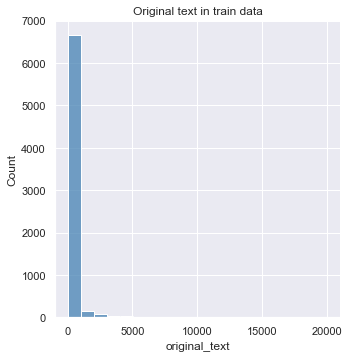

In [52]:
sns.set(color_codes=True)
comment_len = train_data.original_text.str.len()
sns.displot(comment_len, kde=False, bins=20, color="steelblue").set(title="Original text in train data")
print(comment_len)
# plt.savefig("train_data_graph.png")

0      257
1      140
2      164
3      121
4      120
      ... 
773    142
774    124
775    104
776    109
777     85
Name: original_text, Length: 778, dtype: int64


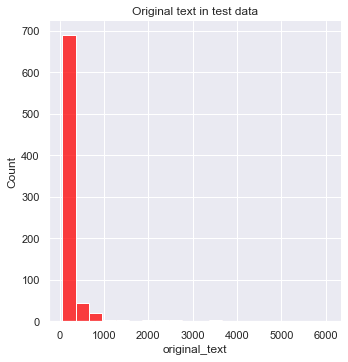

In [51]:
sns.set(color_codes=True)
comment_len = test_data.original_text.str.len()
sns.displot(comment_len, kde=False, bins=20, color="red").set(title="Original text in test data")
print(comment_len)
# plt.savefig("test_data_graph.png")

In [22]:
print('Train data shape: ', train_data.shape)
print('Test data shape: ', test_data.shape)
print('Raw data shape: ', raw_data.shape)

Train data shape:  (6995, 6)
Test data shape:  (778, 6)
Raw data shape:  (7773, 6)


## label distribution

In [23]:
labels = ['pornografi', 'sara', 'radikalisme', 'pencemaran_nama_baik']

In [24]:
def get_label_distribution(data, label):
    return np.sum(data[label])

def get_label_distribution_percent(data, label):
    return np.sum(data[label] / data.shape[0])

### Raw data

In [25]:
for list_column in labels:
    print(raw_data[list_column].value_counts())

0    6026
1    1747
Name: pornografi, dtype: int64
0    6535
1    1238
Name: sara, dtype: int64
0    6497
1    1276
Name: radikalisme, dtype: int64
0    5348
1    2425
Name: pencemaran_nama_baik, dtype: int64


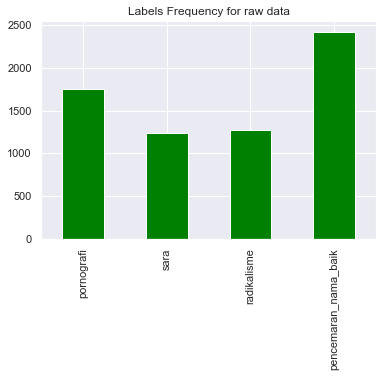

In [54]:
raw_labels = raw_data[labels]
label_count = raw_labels.sum()
label_count.plot(kind='bar', title='Labels Frequency for raw data', color='green')
# plt.savefig("label_frequency_raw_data.png")

In [27]:
for label in labels:
    print(f"% of raw data containing {label}, label: {get_label_distribution_percent(raw_data, label) :.2%} ")

% of raw data containing pornografi, label: 22.48% 
% of raw data containing sara, label: 15.93% 
% of raw data containing radikalisme, label: 16.42% 
% of raw data containing pencemaran_nama_baik, label: 31.20% 


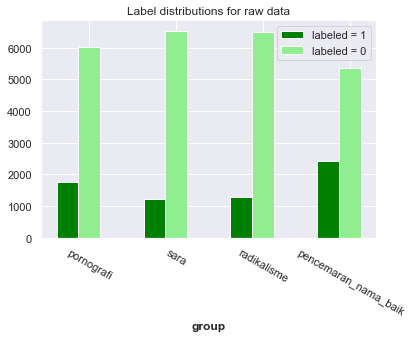

In [28]:
# visualisasi distribusi dari setiap labels di raw data
barWidth = 0.25

bars1 = [sum(raw_data['pornografi'] == 1), sum(raw_data['sara'] == 1), sum(raw_data['radikalisme'] == 1),
        sum(raw_data['pencemaran_nama_baik'] == 1)]
bars2 = [sum(raw_data['pornografi'] == 0), sum(raw_data['sara'] == 0), sum(raw_data['radikalisme'] == 0),
        sum(raw_data['pencemaran_nama_baik'] == 0)]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.bar(r1, bars1, color='green', width=barWidth, label='labeled = 1')
plt.bar(r2, bars2, color='lightgreen', width=barWidth, label='labeled = 0')

plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], labels, rotation = -30)

plt.title("Label distributions for raw data")
plt.legend()
plt.show()

### train data

In [29]:
for label in labels:
    print(f"total of train data containing {label}, label: {get_label_distribution(train_data, label)} ")

total of train data containing pornografi, label: 1574 
total of train data containing sara, label: 1124 
total of train data containing radikalisme, label: 1154 
total of train data containing pencemaran_nama_baik, label: 2180 


In [30]:
for label in labels:
    print(f"% of train data containing {label}, label: {get_label_distribution_percent(train_data, label) :.2%} ")

% of train data containing pornografi, label: 22.50% 
% of train data containing sara, label: 16.07% 
% of train data containing radikalisme, label: 16.50% 
% of train data containing pencemaran_nama_baik, label: 31.17% 


In [31]:
for list_column in labels:
    print(train_data[list_column].value_counts())

0    5421
1    1574
Name: pornografi, dtype: int64
0    5871
1    1124
Name: sara, dtype: int64
0    5841
1    1154
Name: radikalisme, dtype: int64
0    4815
1    2180
Name: pencemaran_nama_baik, dtype: int64


<AxesSubplot:title={'center':'Labels Frequency for training data'}>

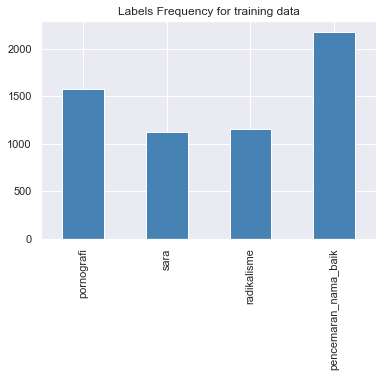

In [32]:
train_labels = train_data[labels]
label_count = train_labels.sum()
label_count.plot(kind='bar', title='Labels Frequency for training data', color='steelblue')

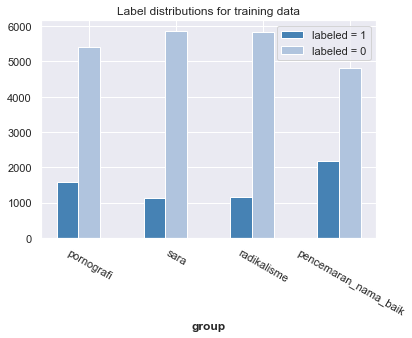

In [33]:
# visualisasi distribusi dari setiap labels di training data
barWidth = 0.25

bars1 = [sum(train_data['pornografi'] == 1), sum(train_data['sara'] == 1), sum(train_data['radikalisme'] == 1),
        sum(train_data['pencemaran_nama_baik'] == 1)]
bars2 = [sum(train_data['pornografi'] == 0), sum(train_data['sara'] == 0), sum(train_data['radikalisme'] == 0),
        sum(train_data['pencemaran_nama_baik'] == 0)]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.bar(r1, bars1, color='steelblue', width=barWidth, label='labeled = 1')
plt.bar(r2, bars2, color='lightsteelblue', width=barWidth, label='labeled = 0')

plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], labels, rotation = -30)

plt.title("Label distributions for training data")
plt.legend()
plt.show()

### test data

In [34]:
for label in labels:
    print(f"total of train data containing {label}, label: {get_label_distribution(test_data, label)} ")

total of train data containing pornografi, label: 173 
total of train data containing sara, label: 114 
total of train data containing radikalisme, label: 122 
total of train data containing pencemaran_nama_baik, label: 245 


In [35]:
for label in labels:
    print(f"% of train data containing {label}, label: {get_label_distribution_percent(test_data, label) :.2%} ")

% of train data containing pornografi, label: 22.24% 
% of train data containing sara, label: 14.65% 
% of train data containing radikalisme, label: 15.68% 
% of train data containing pencemaran_nama_baik, label: 31.49% 


In [36]:
for list_column in labels:
    print(test_data[list_column].value_counts())

0    605
1    173
Name: pornografi, dtype: int64
0    664
1    114
Name: sara, dtype: int64
0    656
1    122
Name: radikalisme, dtype: int64
0    533
1    245
Name: pencemaran_nama_baik, dtype: int64


## Comment text examples

In [37]:
# Train data examples original text

for i in range(10):
    print(f'TEXT {i + 1}')
    print(train_data['original_text'].values[i] + '\n')

TEXT 1
[QUOTE=jessepinkman16;5a50ac34d89b093f368b456e]jabar emng propinsi barokah :lehuga[/QUOTE]\n\nWOI, ANJING GOBLOK\nPROPINSI YANG PALING BANYAK NGERUSAK DAN NGEBAKAR GEREJA ITU JATIM, GAK LU SEBUT PROPINSI LUMBUNG NASBUNG TUH JATIM?\nPROPINSI PENGHASIL GEMBONG TERORIS TERBANYAK ITU JATENG, GAK LU SEBUT LUMBUNG NASBUNG TUH JATENG?\nNGARANG STEREOTIP KOK PILIAH PILIH?\nBANGGSAT LU PECUN


TEXT 2
@verosvante kita2 aja nitizen yang pada kepo,toh keluarga besar pasti udh pada tau,situ jg kalo urusan nya diurusin orang pasti ngamuk2,ngedumel "ngasih makan engga sibuk ngurusin urusan gw"yakan?setiap orang pnya cara masng2 buat mensyukuri kebahagiaannya ,ada yg di publis ada yg disimpen yg pntng tujuannya apa!trus kalo soal hijrahnya karna habib ya berarti Allah ngasih jalannya lewat situ,kan jalan hijrah manusia itu msng2 pintunya ,jgn so tau makanya

TEXT 3
"#SidangAhok smg sipenista agama n ateknya matinya tdk wjar n jasadnya tdk dtrma tnh n dia tdk prnh mrs kn sorga,aamiin semoga tuha

## Correlation matrix across labels

<AxesSubplot:>

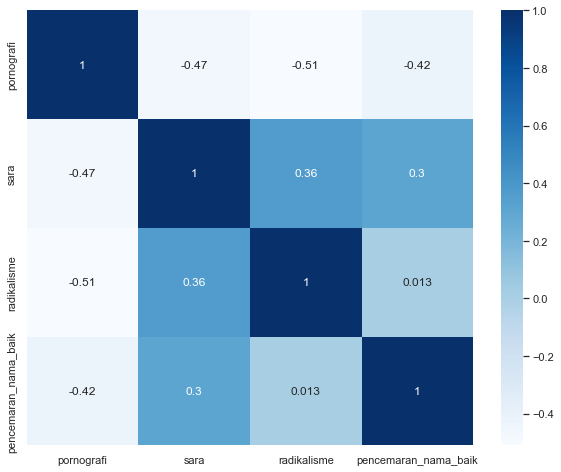

In [38]:
rowsums = train_data.iloc[:, 2:].sum(axis=1)
temp = train_data.iloc[:, 2:]
train_corr = temp[rowsums > 0]
corr = train_corr.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values, annot=True, cmap='Blues')

## Generate word clouds

In [39]:
def W_Cloud(token):
    threat_context = train_data[train_data[token] == 1]
    threat_text = threat_context.original_text
    neg_text = pd.Series(threat_text).str.cat(sep=' ')
    wordcloud = WordCloud(width=1600, height=800,
                         max_font_size=200).generate(neg_text)
    
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud.recolor(colormap='Blues'), interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Most common words assosiated with {token} comment", size=20)
    plt.show()

Choose a class to visualize the most common words contributing to the class:  sara


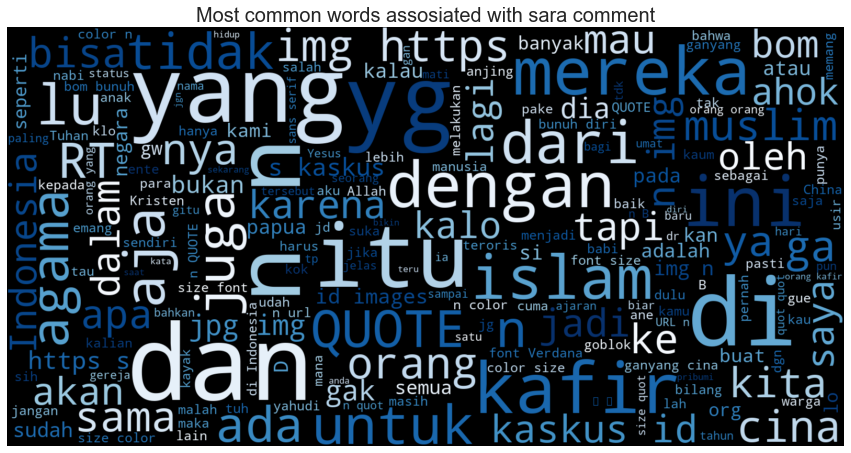

In [56]:
# interactive visual: enter the label name
token = input("Choose a class to visualize the most common words contributing to the class: ")
W_Cloud(token.lower())